# Course: Data Science                                                                                       


# Project: Clustering                  

# Worked By: Rifat Jahan Lia, M1,Iot

# Step 1: Importing the necessary libraries and loading the dataset

I have used the iris.csv dataset for this project. The link of the dataset is here: https://www.kaggle.com/datasets/saurabh00007/iriscsv


In [79]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from numpy import unique
from numpy import where
from matplotlib import pyplot
import seaborn as sns
from sklearn.decomposition import PCA

In [80]:
ds = pd.read_csv('/Users/NC/Documents/M1-Semester2/Data Science/Prf. Guyeux Christophe/TP/Clusltering/iris.csv',header = None)
ds

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Step 2: Data Preprocessing

In [81]:
ds = ds.rename(columns={0: 'Sepal length', 1: 'Sepal width', 2:'Petal length', 3:'Petal width',4:'Species'})

In [82]:
ds

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [83]:
ds.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [84]:
#repalcing Species name
ds = ds.replace({'Species' : {'Iris-setosa': 0, 'Iris-versicolor' : 1,'Iris-virginica' : 2}})

In [85]:
ds

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [100]:
X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

ds

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [145]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Step 3: Applying various clustering methods/algorithms

In [90]:
from sklearn.cluster import AffinityPropagation,KMeans,MeanShift


# AffinityPropagation

In [132]:
trainData1 = np.array(ds)
# defining the model
model = AffinityPropagation(damping=0.7)

#training the model
model.fit(trainData1)

# assigning each data point to a cluster
result = model.predict(trainData1)

# getting all of the unique clusters
clusters = unique(result)


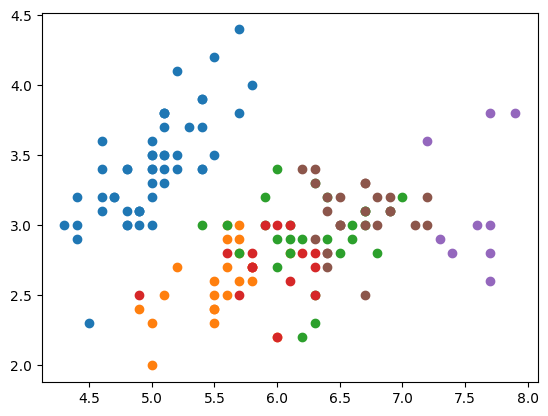

In [133]:
for cluster in clusters:
    # getting data points that fall in this cluster
    index = where(result == cluster)
    # making the plot
    pyplot.scatter(trainData1[index, 0], trainData1[index, 1])

# MeanShift

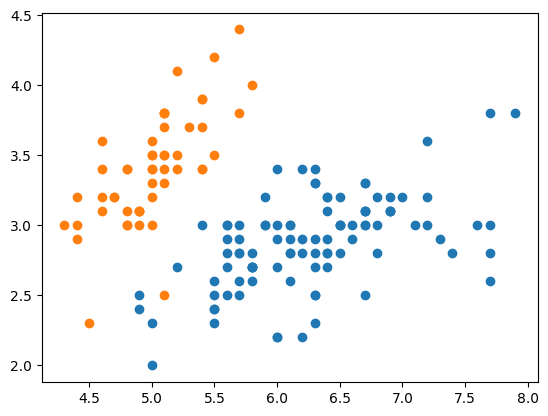

In [134]:
trainData2 = np.array(ds)

# defining the model
mean_model = MeanShift()

# assigning each data point to a cluster
mean_result = mean_model.fit_predict(trainData2)

# getting all of the unique clusters
mean_clusters = unique(mean_result)


# plotting Mean-Shift the clusters
for mean_cluster in mean_clusters:
    # getting data points that fall in this cluster
    index = where(mean_result == mean_cluster)
    # making the plot
    pyplot.scatter(trainData2[index, 0], trainData2[index, 1])

# showing the Mean-Shift plot
pyplot.show()

# KMeans

C:\Users\NC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


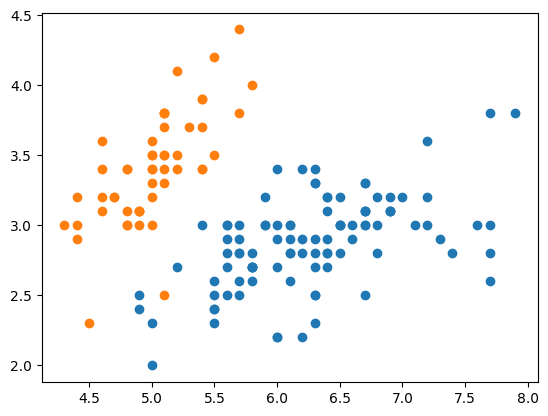

In [135]:
trainData3 = np.array(ds)

# defining the model
model = KMeans(n_clusters=2)

# fitting the model
model.fit(trainData3)

# assigning a cluster to each example
result = model.predict(trainData3)

# retrieving unique clusters
clusters = unique(result)

# creating scatter plot for samples from each cluster
for cluster in clusters:
 # getting row indexes for samples with this cluster
 row_ix = where(result == cluster)
 # creating scatter of these samples
 pyplot.scatter(trainData3[row_ix, 0], trainData3[row_ix, 1])
# showing the plot
pyplot.show()

# Step 4: Applying several evaluation metrics

I am using three evaluation metrics. They are- 1.Silhouette 2. Adjusted Rand Index  and 3. Homogeneity

In [136]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score


# Evaluating clustering algorithms 
for algorithm in [af, ms, kmeans]:
    algorithm.fit(X)
    labels = algorithm.labels_
    sil_score = silhouette_score(X, labels)
    ar_score = adjusted_rand_score(y, labels)
    homo_score = homogeneity_score(y, labels)
    print(f"\n{algorithm.__class__.__name__}: \n Silhouette Score: {sil_score:.3f}, \n Adjusted Rand Index: {ar_score:.3f}, \n Homogeneity Score: {homo_score:.3f}")



AffinityPropagation: 
 Silhouette Score: 0.343, 
 Adjusted Rand Index: 0.312, 
 Homogeneity Score: 0.839

MeanShift: 
 Silhouette Score: 0.580, 
 Adjusted Rand Index: 0.568, 
 Homogeneity Score: 0.579

KMeans: 
 Silhouette Score: 0.459, 
 Adjusted Rand Index: 0.620, 
 Homogeneity Score: 0.659


C:\Users\NC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


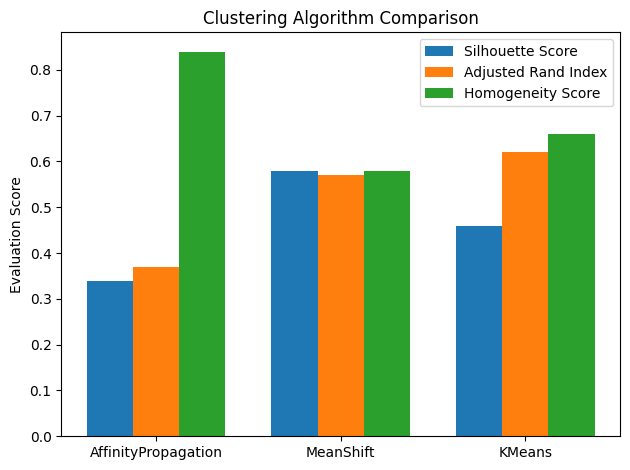

In [137]:
# Plotting the results
labels = ['AffinityPropagation', 'MeanShift', 'KMeans']

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, sil_scores, width, label='Silhouette Score')
rects2 = ax.bar(x, ar_scores, width, label='Adjusted Rand Index')
rects3 = ax.bar(x + width, homo_scores, width, label='Homogeneity Score')

ax.set_ylabel('Evaluation Score')
ax.set_title('Clustering Algorithm Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


# Step 5: Applying Reduction Techniques

I am applying reduction techniques PCA

C:\Users\NC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


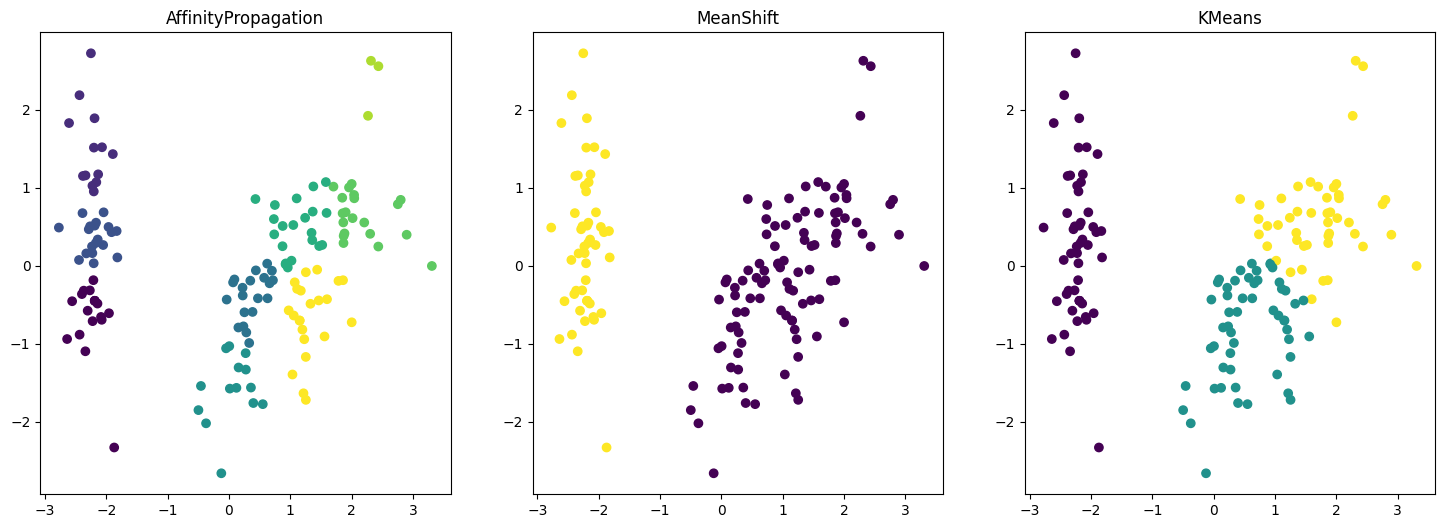

In [138]:

from sklearn.decomposition import PCA

# Defining clustering algorithms
ap = AffinityPropagation()
ms = MeanShift()
km = KMeans(n_clusters=3)

# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Applying clustering algorithms to the reduced data
ap.fit(X_pca)
labels_ap = ap.labels_

ms.fit(X_pca)
labels_ms = ms.labels_

km.fit(X_pca)
labels_km = km.labels_

# Plotting the results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_ap)
axs[0].set_title('AffinityPropagation')
axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_ms)
axs[1].set_title('MeanShift')
axs[2].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_km)
axs[2].set_title('KMeans')
plt.show()


# Step 6: Applying evalution matric after applying PCA

In [140]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score


# Evaluating clustering algorithms
for algorithm in [af, ms, kmeans]:
    algorithm.fit(X_pca)
    labels = algorithm.labels_
    sil_score = silhouette_score(X_pca, labels)
    ar_score = adjusted_rand_score(y, labels)
    homo_score = homogeneity_score(y, labels)
    print(f"\n{algorithm.__class__.__name__}: \n Silhouette Score: {sil_score:.3f}, \n Adjusted Rand Index: {ar_score:.3f}, \n Homogeneity Score: {homo_score:.3f}")



AffinityPropagation: 
 Silhouette Score: 0.440, 
 Adjusted Rand Index: 0.322, 
 Homogeneity Score: 0.812

MeanShift: 
 Silhouette Score: 0.613, 
 Adjusted Rand Index: 0.568, 
 Homogeneity Score: 0.579

KMeans: 
 Silhouette Score: 0.508, 
 Adjusted Rand Index: 0.620, 
 Homogeneity Score: 0.659


C:\Users\NC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


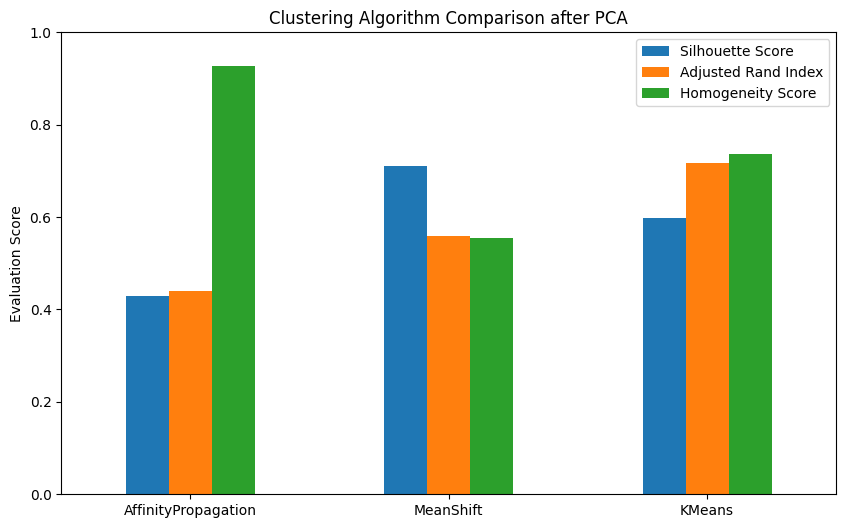

In [143]:
# Plotting the scores
scores_df.plot(kind='bar', rot=0, figsize=(10,6))
plt.title('Clustering Algorithm Comparison after PCA')
plt.ylabel('Evaluation Score')
plt.ylim(0,1)
plt.show()

# Step 7: Comparisom among the result before and after applying PCA 

# Before = Before applying reduction techniques(PCA)                                    
After = After applying reduction techniques(PCA)

AffinityPropagation: Before Silhouette Score: 0.347, After Silhouette Score: 0.428, Impovement: 0.081
                     Before Adjusted Rand Index: 0.481, After Adjusted Rand Index: 0.440, Improvement: -0.041
                     Before Homogeneity Score: 0.915, After Homogeneity Score: 0.927, Improvement: 0.012
                                
                        
MeanShift: Before Silhouette Score: 0.686, After Silhouette Score: 0.710, Improvement: 0.024
           Before Adjusted Rand Index: 0.558, After Adjusted Rand Index: 0.558, Improvement: 0
           Before Homogeneity Score: 0.554, After Homogeneity Score: 0.554, Improvement: 0
        
KMeans:  Before Silhouette Score: 0.553, After Silhouette Score: 0.598, Improvement: 0.045
         Before Adjusted Rand Index: 0.730, After Adjusted Rand Index: 0.716, Improvement: -0.014
         Before Homogeneity Score: 0.751, After Homogeneity Score: 0.736, Improvement: -0.015



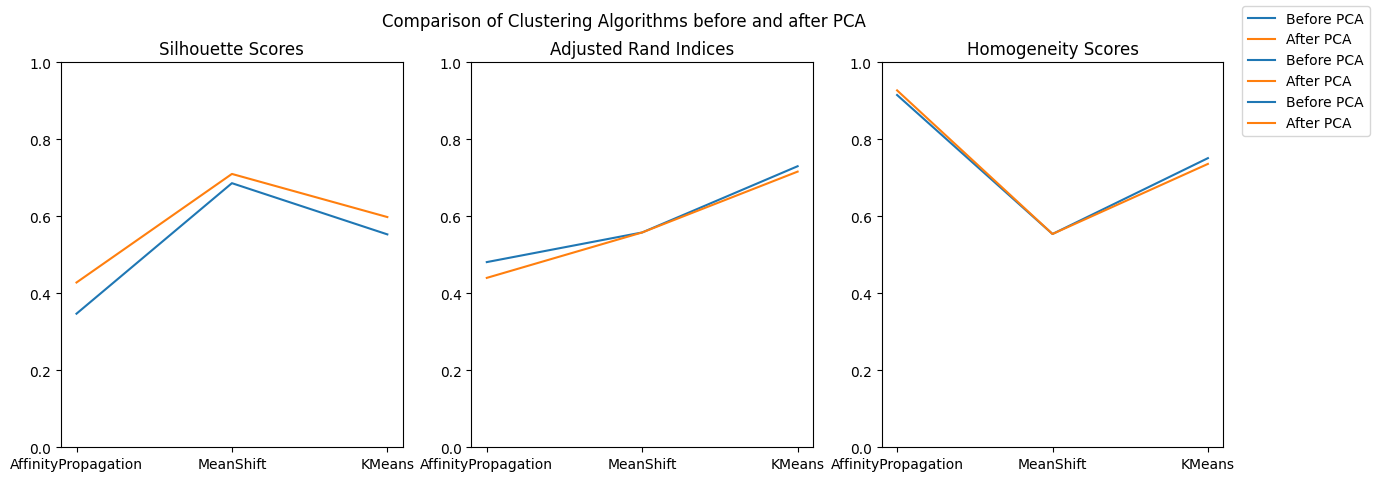

In [144]:
import matplotlib.pyplot as plt

# Data before applying PCA
before_sil_scores = [0.347, 0.686, 0.553]
before_rand_indices = [0.481, 0.558, 0.730]
before_homo_scores = [0.915, 0.554, 0.751]

# Data after applying PCA
after_sil_scores = [0.428, 0.710, 0.598]
after_rand_indices = [0.440, 0.558, 0.716]
after_homo_scores = [0.927, 0.554, 0.736]

# Creating subplots for each evaluation metric
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plotting Silhouette Scores
ax1.plot(['AffinityPropagation', 'MeanShift', 'KMeans'], before_sil_scores, label='Before PCA')
ax1.plot(['AffinityPropagation', 'MeanShift', 'KMeans'], after_sil_scores, label='After PCA')
ax1.set_title('Silhouette Scores')
ax1.set_ylim([0, 1])

# Plotting Adjusted Rand Index
ax2.plot(['AffinityPropagation', 'MeanShift', 'KMeans'], before_rand_indices, label='Before PCA')
ax2.plot(['AffinityPropagation', 'MeanShift', 'KMeans'], after_rand_indices, label='After PCA')
ax2.set_title('Adjusted Rand Indices')
ax2.set_ylim([0, 1])

# Plotting Homogeneity Scores
ax3.plot(['AffinityPropagation', 'MeanShift', 'KMeans'], before_homo_scores, label='Before PCA')
ax3.plot(['AffinityPropagation', 'MeanShift', 'KMeans'], after_homo_scores, label='After PCA')
ax3.set_title('Homogeneity Scores')
ax3.set_ylim([0, 1])

# Adding legend and title to the figure
fig.suptitle('Comparison of Clustering Algorithms before and after PCA')
fig.legend()

#displaying
plt.show()


# Step 8: Findings and Conclustion

In Step 4 and Step 6, we can see that KMeans performs the best based on all three metrics providing a higher silhouette score, adjusted rand index and homogeneity score compared to the other two algorithms without or with applying reduction technique PCA. So, we can declear KMeans as the best clusting algorithm for this situation.

In Step 7, we can see the comparisom among the  values of the Silhouette Score, Adjusted Rand Index, and Homogeneity Score before and after applying dimensionality reduction. We can see that all three algorithms improved their Silhouette Scores after the reduction while only AffinityPropagation saw a decrease in its AR Index. All three algorithms also saw a decrease in their Homogeneity Scores after the reduction.

